In [11]:
from pathlib import Path
import shutil as sh
import json
import pandas as pd
import numpy as np

models_path = Path('./curr_models')
stats_path = Path('./stats')

if not stats_path.exists():
    stats_path.mkdir()


for model in models_path.iterdir():
    if not model.is_dir():
        continue
    sh.copy(str(model / 'stats.json') , str(stats_path / f'{model.stem}.json') )
    
stats_files = list(stats_path.iterdir())

In [12]:
stats_df = pd.DataFrame()
for stat_f in stats_files:
    print("========= " + stat_f.stem + " ==========")
    
    with open(stat_f, 'r') as f:
        stats = json.load(f)
        
        for k, run in stats.items():
            print(f'--- {k}: {len(run)} ---') 
            
            print(k, run)
            
            loss = 0
            cluster_sizes = []
            for cluster in run:
                loss += cluster['loss']*cluster['cluster_size']
                cluster_sizes.append(cluster['cluster_size'])
            loss /= 1179 
            
            stats_df = pd.concat([stats_df, pd.DataFrame([
                    {'model': stat_f.stem, 
                    'run': k, 
                    'cluster sizes':cluster_sizes, 
                    'nclusters': len(run),
                    'avg loss': loss,
                    'min loss' : min([c['loss'] for c in run]),
                    'max loss': max([c['loss'] for c in run]),
                    'std loss': np.std([c['loss'] for c in run]),}
                ])
            ])
                
            print("Average Cluster Loss: ", loss)
stats_df.reset_index(drop=True, inplace=True)
stats_df[['run', 'nclusters']] = stats_df[['run', 'nclusters']].astype(int)
        
    

========= minisom_alpha ==========
--- 0: 4 ---
0 [{'run': 0, 'cluster': 2, 'loss': 0.07188356667757034, 'mse': 0.07188356667757034, 'cluster_size': 393}, {'run': 0, 'cluster': 1, 'loss': 0.08887708187103271, 'mse': 0.08887708187103271, 'cluster_size': 241}, {'run': 0, 'cluster': 4, 'loss': 0.07534775137901306, 'mse': 0.07534775137901306, 'cluster_size': 312}, {'run': 0, 'cluster': 3, 'loss': 0.07023060321807861, 'mse': 0.07023060321807861, 'cluster_size': 233}]
Average Cluster Loss:  0.07594728364314539
========= pca_agg_alpha ==========
--- 0: 2 ---
0 [{'run': 0, 'cluster': 0, 'loss': 0.07402852922677994, 'mse': 0.07402852922677994, 'cluster_size': 705}, {'run': 0, 'cluster': 1, 'loss': 0.0798158273100853, 'mse': 0.0798158273100853, 'cluster_size': 474}]
Average Cluster Loss:  0.07635522921955919
--- 1: 3 ---
1 [{'run': 1, 'cluster': 0, 'loss': 0.07331039756536484, 'mse': 0.07331040501594543, 'cluster_size': 347}, {'run': 1, 'cluster': 1, 'loss': 0.08020152151584625, 'mse': 0.0802015

# Model Results

In [13]:
stats_df

,model,run,cluster sizes,nclusters,avg loss,min loss,max loss,std loss
0,minisom_alpha,0,"[393, 241, 312, 233]",4,0.075947,0.070231,0.088877,0.007333
1,pca_agg_alpha,0,"[705, 474]",2,0.076355,0.074029,0.079816,0.002894
2,pca_agg_alpha,1,"[347, 474, 358]",3,0.078082,0.073310,0.080202,0.003180
3,robust_pca_kmeans,0,"[705, 474]",2,0.079562,0.076697,0.083823,0.003563
4,robust_pca_kmeans,1,"[473, 404, 302]",3,0.071963,0.058133,0.080587,0.009264
5,robust_pca_kmeans,2,"[321, 214, 262, 382]",4,0.070364,0.067688,0.072727,0.002144
6,robust_pca_kmeans,3,"[229, 198, 171, 323, 258]",5,0.074498,0.061937,0.082220,0.007423
7,ts_kmeans_mag,0,"[590, 589]",2,0.080931,0.077063,0.084794,0.003865
8,ts_kmeans_mag,1,"[590, 276, 313]",3,0.075368,0.060684,0.084855,0.009880
9,ts_kmeans_mag,2,"[254, 276, 313, 336]",4,0.060428,0.044577,0.072405,0.009973


## Top 10

In [14]:
top10 = list(stats_df['avg loss'].nsmallest(10).index)
stats_df.loc[top10]

,model,run,cluster sizes,nclusters,avg loss,min loss,max loss,std loss
53,pca_kmeans_mag,3,"[165, 243, 346, 243, 182]",5,0.057909,0.040190,0.079646,0.012706
52,pca_kmeans_mag,2,"[336, 243, 346, 254]",4,0.059416,0.049454,0.080045,0.011711
9,ts_kmeans_mag,2,"[254, 276, 313, 336]",4,0.060428,0.044577,0.072405,0.009973
45,minisom_mag,0,"[342, 316, 248, 273]",4,0.061388,0.056802,0.069760,0.005255
40,pca_agg_mag,2,"[356, 314, 276, 233]",4,0.062260,0.055021,0.076719,0.008972
18,standard_pca_kmeans,2,"[262, 321, 214, 382]",4,0.063782,0.058896,0.067116,0.003439
43,quantile_pca_kmeans,2,"[262, 321, 214, 382]",4,0.063906,0.059544,0.066984,0.003215
56,quantile_pca_agg,2,"[410, 277, 295, 197]",4,0.067374,0.043820,0.077203,0.012745
31,minmax_pca_agg,2,"[410, 277, 295, 197]",4,0.067536,0.042786,0.077274,0.013252
51,pca_kmeans_mag,1,"[590, 243, 346]",3,0.069591,0.055459,0.080349,0.010492


# Prediction Plots

In [39]:
import pickle as pkl
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Dict, List, Tuple
from sklearn.preprocessing import QuantileTransformer

clusters_path = Path('../conf')
data_path = Path('../../data/original/compiled/')

df = pd.read_csv(data_path / 'output_n_data_compilation.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
0,1.000217e+16,8.193120e+15,6.715314e+15,5.498005e+15,4.505819e+15,3.687822e+15,3.021775e+15,2.472620e+15,2.025403e+15,1.657160e+15,...,462.633111,451.973845,446.582447,436.377631,431.264025,421.492551,416.638916,407.279913,402.670529,393.703432
1,1.000221e+16,8.193024e+15,6.715368e+15,5.497890e+15,4.505836e+15,3.687712e+15,3.021765e+15,2.472536e+15,2.025369e+15,1.657108e+15,...,449.844506,439.479804,434.232536,424.309986,419.333125,409.832092,405.108290,396.008480,391.522390,382.803778
2,1.000225e+16,8.193603e+15,6.714919e+15,5.498344e+15,4.505455e+15,3.688046e+15,3.021521e+15,2.472709e+15,2.025288e+15,1.657122e+15,...,403.635266,394.304351,389.550971,380.619957,376.111878,367.561995,363.283462,355.096177,351.033197,343.190316
3,1.000303e+16,8.193588e+15,6.716035e+15,5.498272e+15,4.506326e+15,3.687947e+15,3.022132e+15,2.472676e+15,2.025636e+15,1.657206e+15,...,331.338224,323.641913,319.681458,312.317590,308.562083,301.514769,297.950996,291.204684,287.820922,281.360314
4,1.000302e+16,8.193542e+15,6.716061e+15,5.498240e+15,4.506354e+15,3.687918e+15,3.022161e+15,2.472651e+15,2.025659e+15,1.657190e+15,...,336.769975,328.952098,324.933164,317.452711,313.641672,306.482516,302.866024,296.012375,292.578503,286.014913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1.000374e+16,8.194378e+15,6.716306e+15,5.498812e+15,4.506455e+15,3.688331e+15,3.022190e+15,2.472936e+15,2.025676e+15,1.657357e+15,...,189.867353,185.410367,183.087227,178.825364,176.623298,172.547020,170.458135,166.558141,164.575406,160.842583
1174,1.000373e+16,8.194373e+15,6.716304e+15,5.498809e+15,4.506454e+15,3.688328e+15,3.022189e+15,2.472934e+15,2.025675e+15,1.657356e+15,...,191.354286,186.863266,184.522897,180.228457,178.010027,173.902543,171.798141,167.868230,165.870757,162.109270
1175,1.000370e+16,8.194340e+15,6.716283e+15,5.498787e+15,4.506440e+15,3.688313e+15,3.022180e+15,2.472924e+15,2.025669e+15,1.657349e+15,...,208.303178,203.417831,200.877088,196.205277,193.796841,189.328149,187.043413,182.767658,180.598983,176.506238
1176,1.000375e+16,8.194391e+15,6.716319e+15,5.498822e+15,4.506464e+15,3.688338e+15,3.022197e+15,2.472941e+15,2.025681e+15,1.657361e+15,...,188.836141,184.403194,182.092302,177.853444,175.662983,171.608744,169.530854,165.651951,163.679669,159.967038


## Helper Functions

In [19]:

def load_original_data(data_path: Path) -> Dict[str, pd.DataFrame]:
    """Load the original data from the file."""
    
    inputs = pd.read_csv(data_path / 'inputsdata_compilation.csv')
    inputs.rename({'Unnamed: 0': 'filename'}, axis=1, inplace=True)
    outputs = pd.read_csv(data_path / 'outputsdata_compilation.csv')
    outputs.rename({'Unnamed: 0': 'filename'}, axis=1, inplace=True)    
    
    input_filenames = inputs[['filename']]
    output_filenames = outputs[['filename']]
    
    print(outputs.columns)
    scaler_inputs, scaler_ouputs = QuantileTransformer(), QuantileTransformer()
    inputs = scaler_inputs.fit_transform(inputs.iloc[:, 1:])
    outputs = scaler_ouputs.fit_transform(outputs.iloc[:, 1:])
    
    
    inputs = pd.DataFrame(inputs)
    inputs = pd.concat([input_filenames, inputs], axis=1)
    
    outputs = pd.DataFrame(outputs)
    outputs = pd.concat([output_filenames, outputs], axis=1)
    
    # print("Scaled inputs:", inputs.head())
    # print("Scaled outputs:", outputs.head())
    return inputs, outputs, scaler_inputs, scaler_ouputs

def join_files_in_cluster(cluster_files: List[Path], input_data : pd.DataFrame, output_data : pd.DataFrame) -> pd.DataFrame:
    """Join all files in a cluster into a single dataframe."""
    cluster_inputs, cluster_outputs = pd.DataFrame(), pd.DataFrame()
    
    for f in cluster_files:
        cluster_inputs = pd.concat(
                            [
                                cluster_inputs, 
                                input_data.loc[input_data['filename'] == f].iloc[:, 1:]
                            ],
                            axis=0, ignore_index=True)
        cluster_outputs = pd.concat(
                            [
                                cluster_outputs, 
                                output_data.loc[output_data['filename'] == f].iloc[:, 1:]
                            ], 
                            axis=0, ignore_index=True)        

    print("Cluster shape:", cluster_inputs.shape)

    # TODO val split
    return cluster_inputs, cluster_outputs

In [35]:
def plot_cluster_preds(pred_df : pd.DataFrame, model_name : str):
    """Plot the predictions of a cluster."""
    ns = pred_df.iloc[:, 0:640]
    vs = pred_df.iloc[:, 640:1280]
    ts = pred_df.iloc[:, 1280:1920]
    
    vs.reset_index(drop=True, inplace=True)
    ts.reset_index(drop=True, inplace=True)
    
    # print(ns)
    
    
    fig, axs = plt.subplots(3, 1, figsize=(12, 6))
    fig.suptitle(f'Predictions for {model_name}')
    
    for _, row in ns.iterrows():
        sns.lineplot(row.values, ax=axs[0], label=None, linewidth=0.1)
        
    for _, row in vs.iterrows():
        sns.lineplot(row.values, ax=axs[1], label=None, linewidth=0.1)

    for _, row in ts.iterrows():
        sns.lineplot(row.values, ax=axs[2], label=None, linewidth=0.1)
    
    plt.show()    
    # axs[0].plot(ns)
    # axs[1].plot(vs)
    # axs[2].plot(ts)

Index(['filename', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918',
       '1919'],
      dtype='object', length=1921)
Cluster shape: (165, 1920)
6/6 [==============================] - 0s 2ms/step


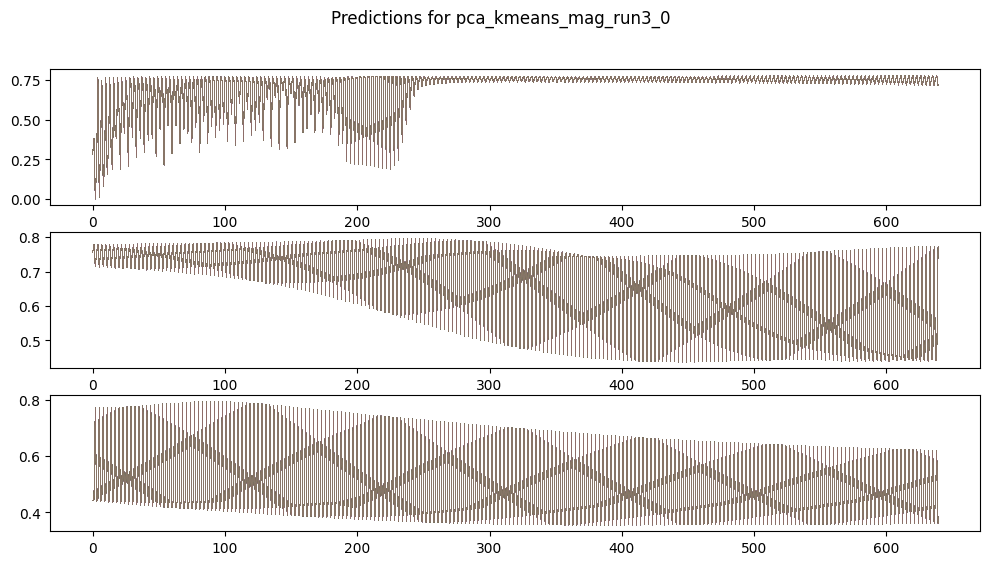

(165, 1920) (165, 1920)
Cluster shape: (243, 1920)
8/8 [==============================] - 0s 3ms/step


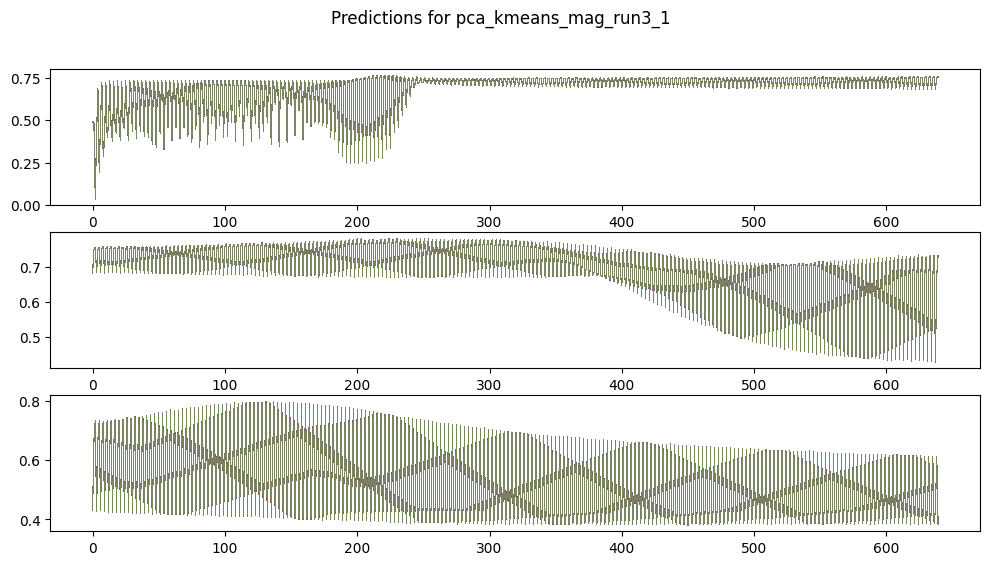

(243, 1920) (243, 1920)
Cluster shape: (346, 1920)
11/11 [==============================] - 0s 2ms/step


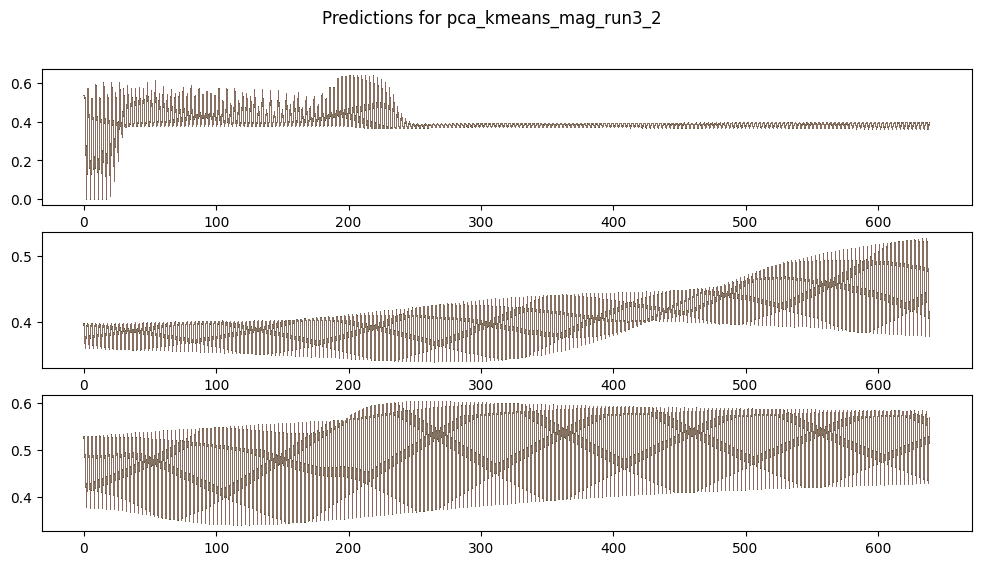

(346, 1920) (346, 1920)
Cluster shape: (243, 1920)
8/8 [==============================] - 0s 2ms/step


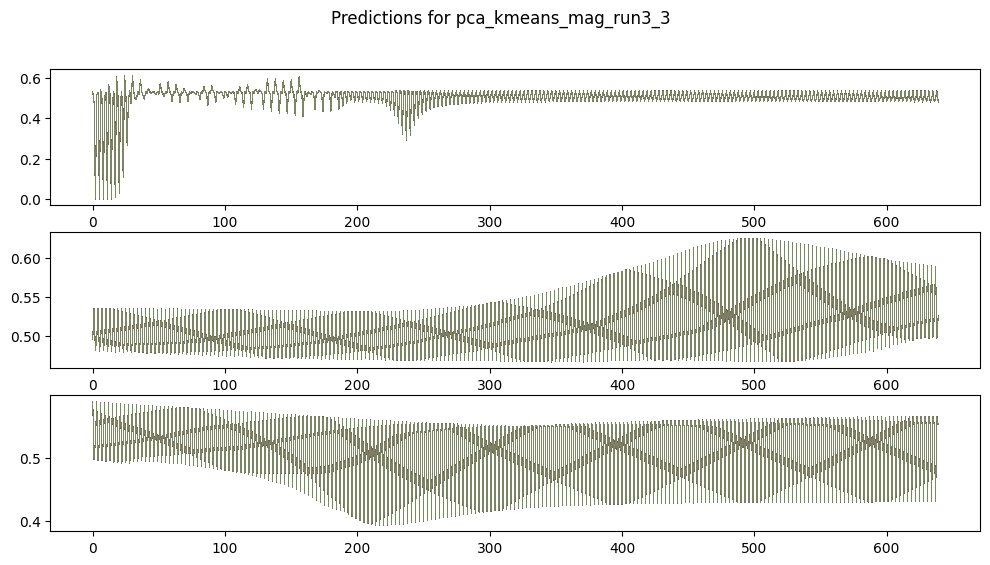

(243, 1920) (243, 1920)
Cluster shape: (181, 1920)
6/6 [==============================] - 0s 3ms/step


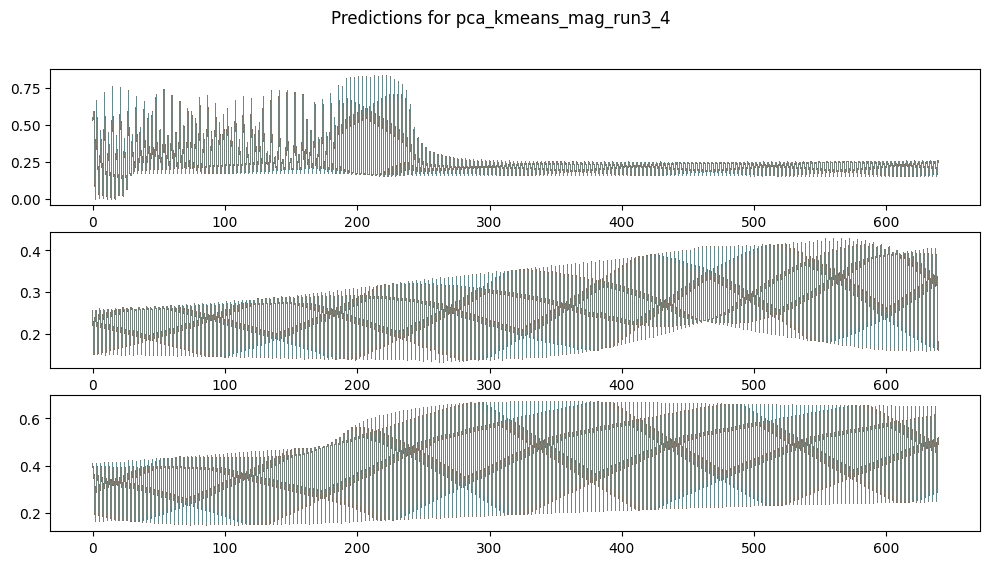

(181, 1920) (181, 1920)
Cluster shape: (336, 1920)
11/11 [==============================] - 0s 2ms/step


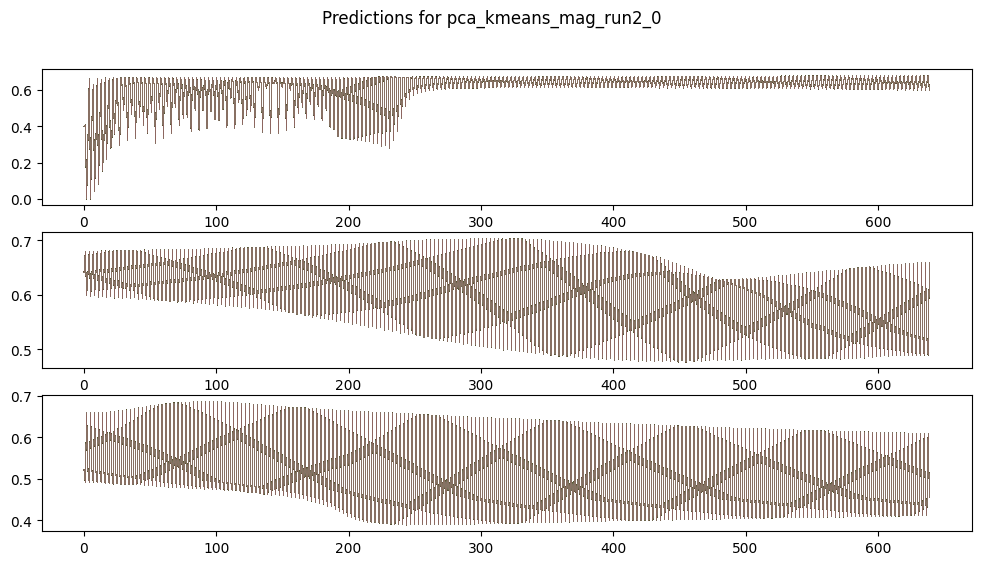

(336, 1920) (336, 1920)
Cluster shape: (243, 1920)
8/8 [==============================] - 0s 1ms/step


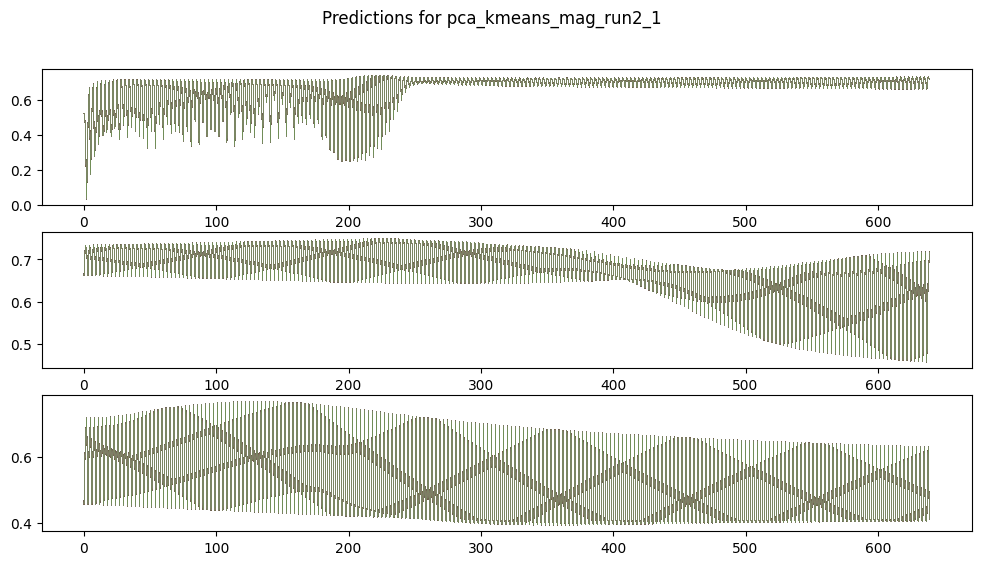

(243, 1920) (243, 1920)
Cluster shape: (346, 1920)
11/11 [==============================] - 0s 3ms/step


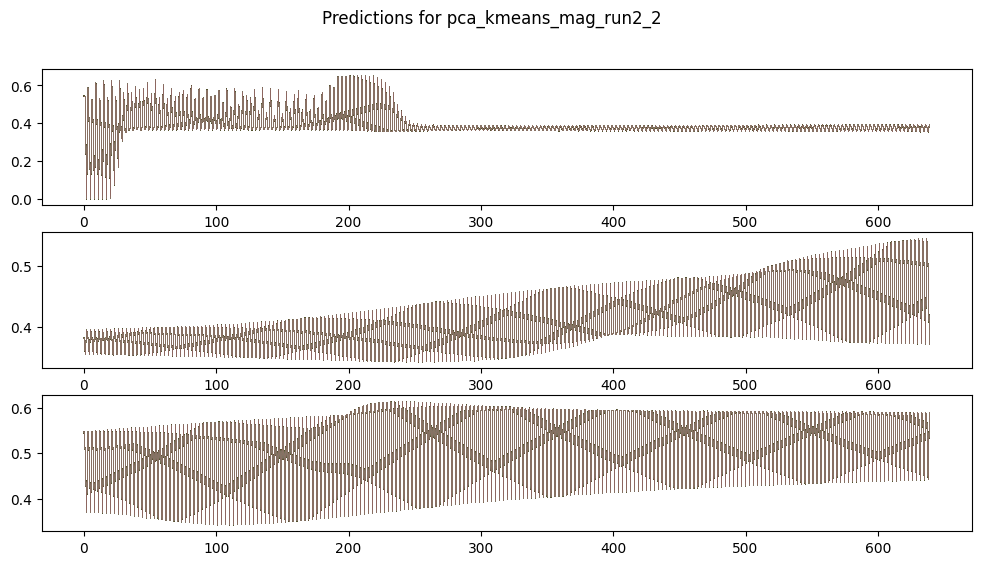

(346, 1920) (346, 1920)
Cluster shape: (253, 1920)
8/8 [==============================] - 0s 3ms/step


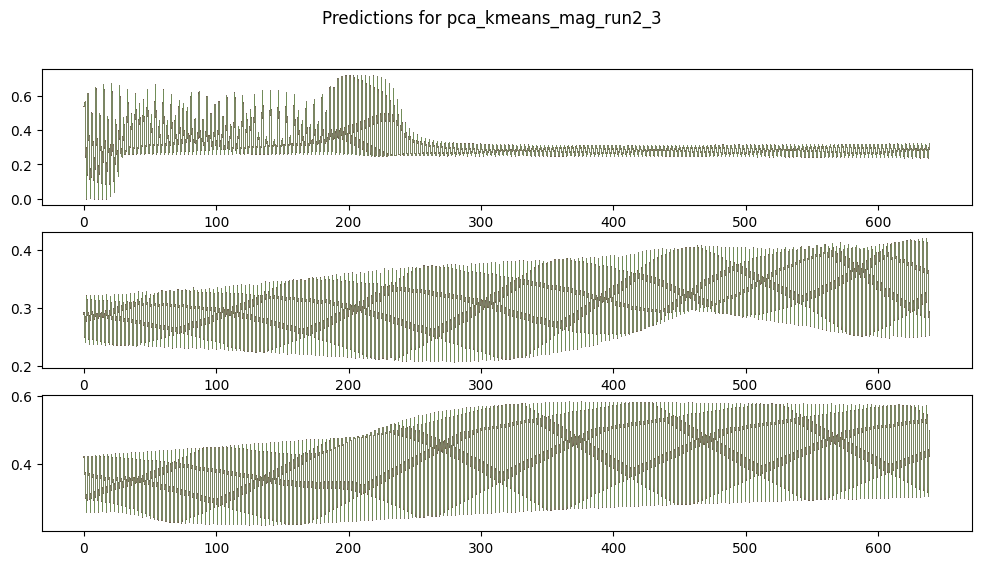

(253, 1920) (253, 1920)
Cluster shape: (336, 1920)
11/11 [==============================] - 0s 3ms/step


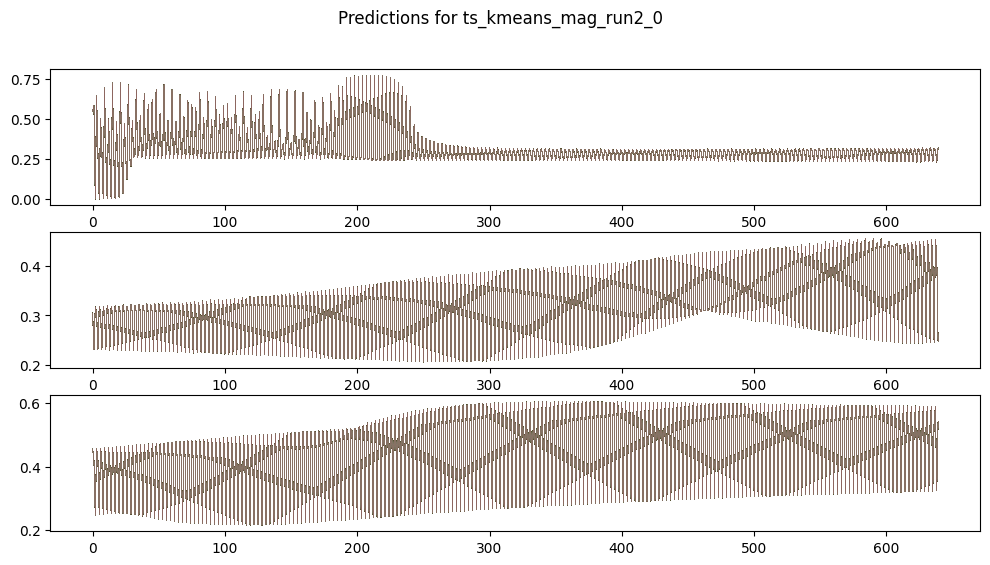

(336, 1920) (336, 1920)
Cluster shape: (243, 1920)
8/8 [==============================] - 0s 2ms/step


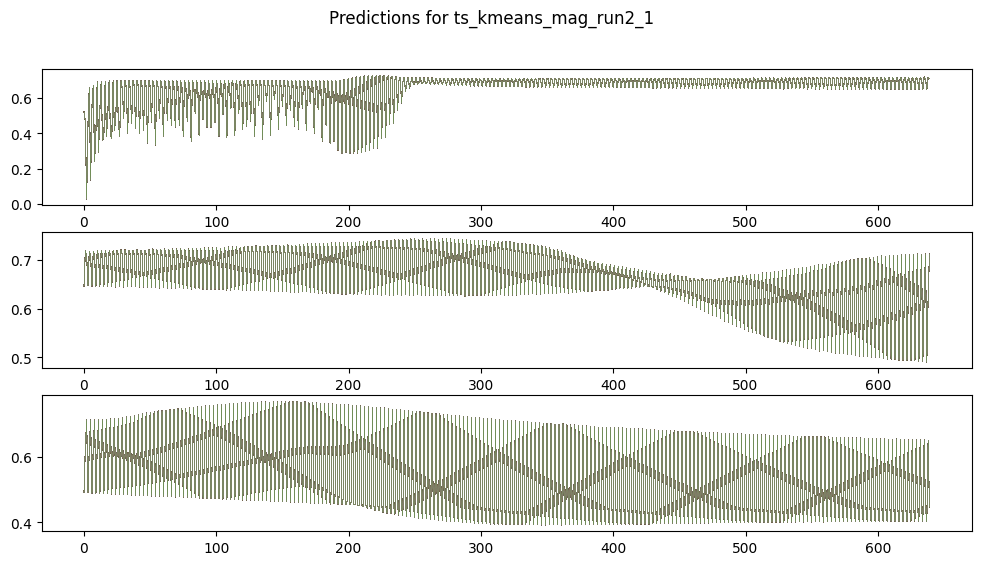

(243, 1920) (243, 1920)
Cluster shape: (346, 1920)
11/11 [==============================] - 0s 1ms/step


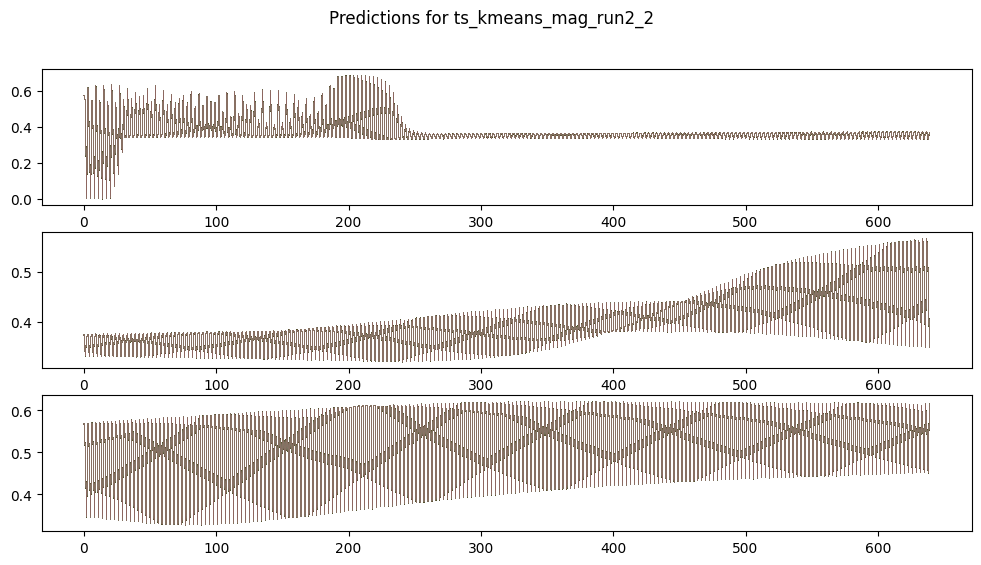

(346, 1920) (346, 1920)
Cluster shape: (253, 1920)
8/8 [==============================] - 0s 2ms/step


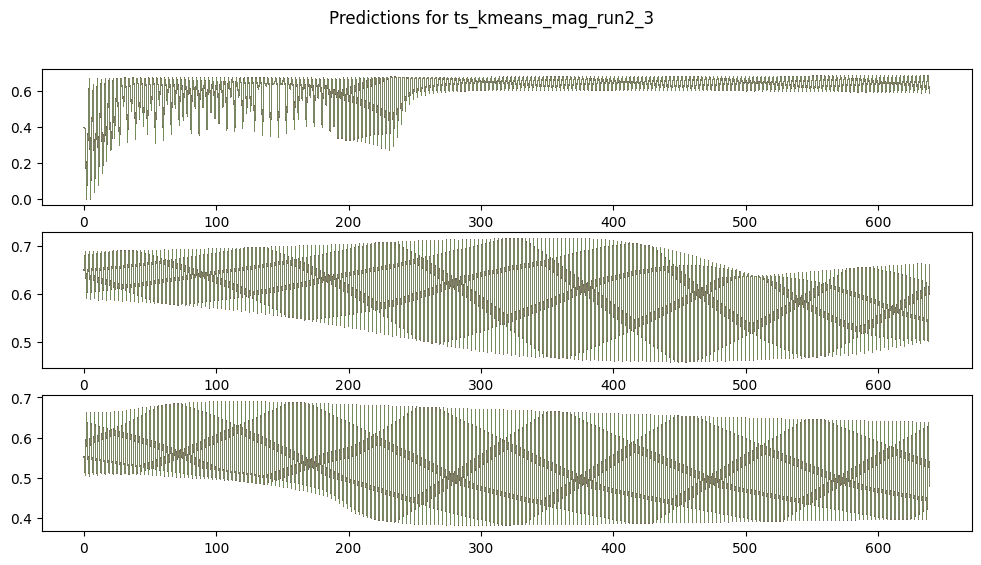

(253, 1920) (253, 1920)
Cluster shape: (355, 1920)
12/12 [==============================] - 0s 2ms/step


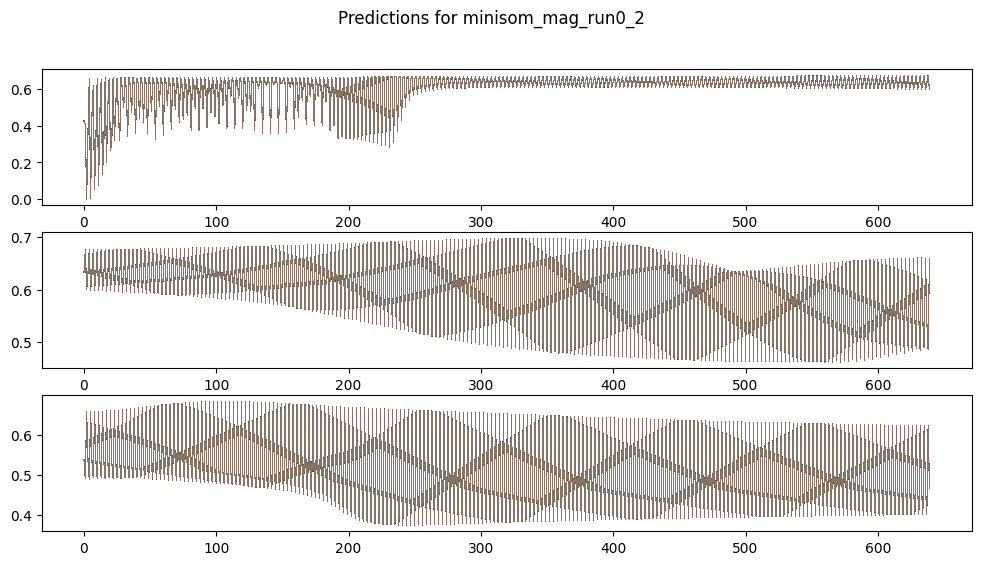

(355, 1920) (355, 1920)
Cluster shape: (234, 1920)
8/8 [==============================] - 0s 2ms/step


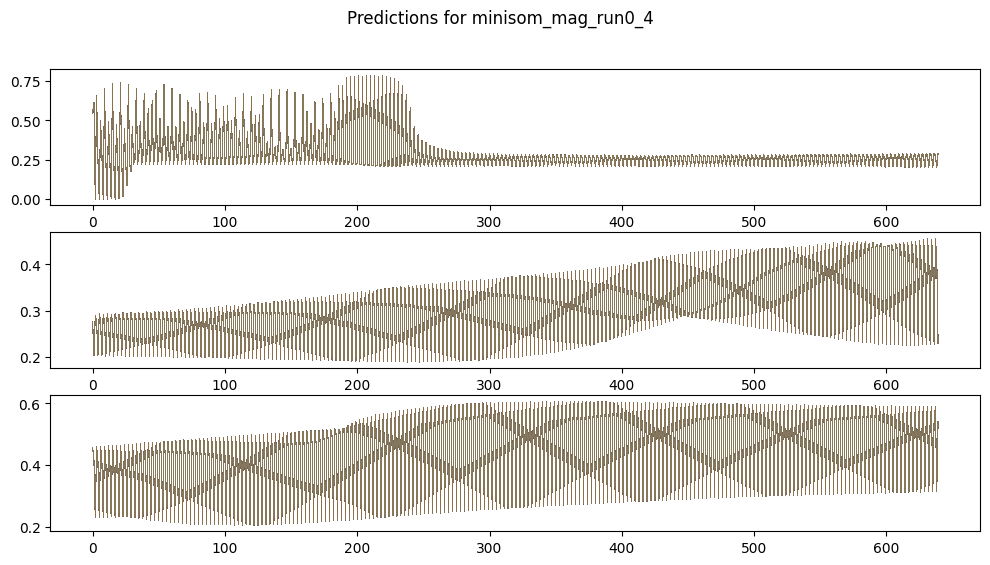

(234, 1920) (234, 1920)
Cluster shape: (274, 1920)
9/9 [==============================] - 0s 2ms/step


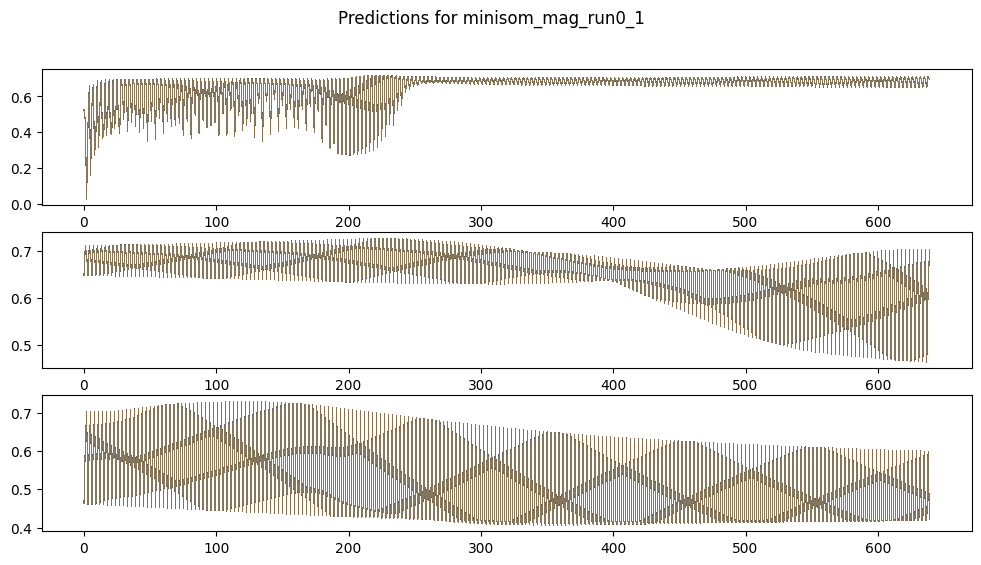

(274, 1920) (274, 1920)
Cluster shape: (315, 1920)
10/10 [==============================] - 0s 1ms/step


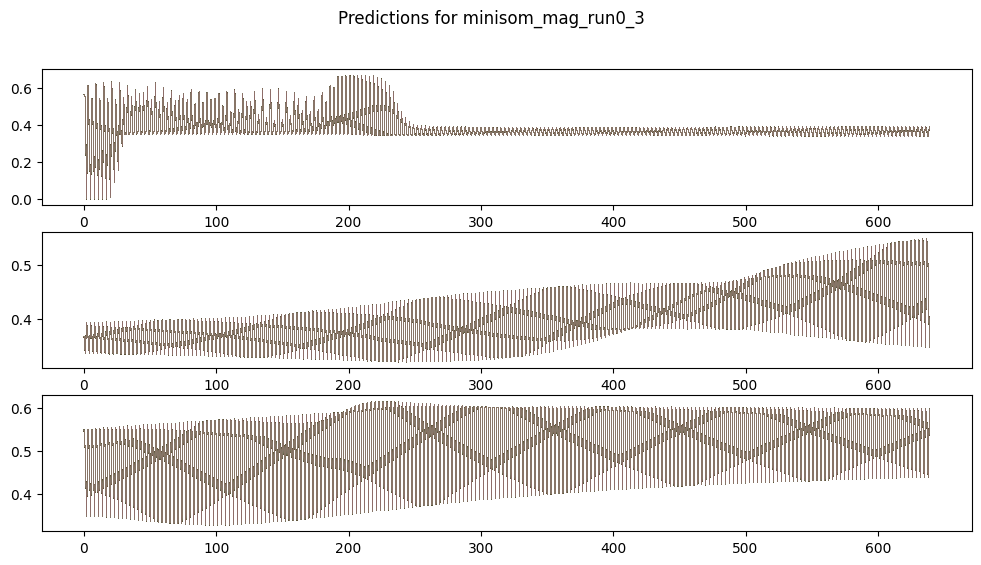

(315, 1920) (315, 1920)
Cluster shape: (356, 1920)
12/12 [==============================] - 0s 1ms/step


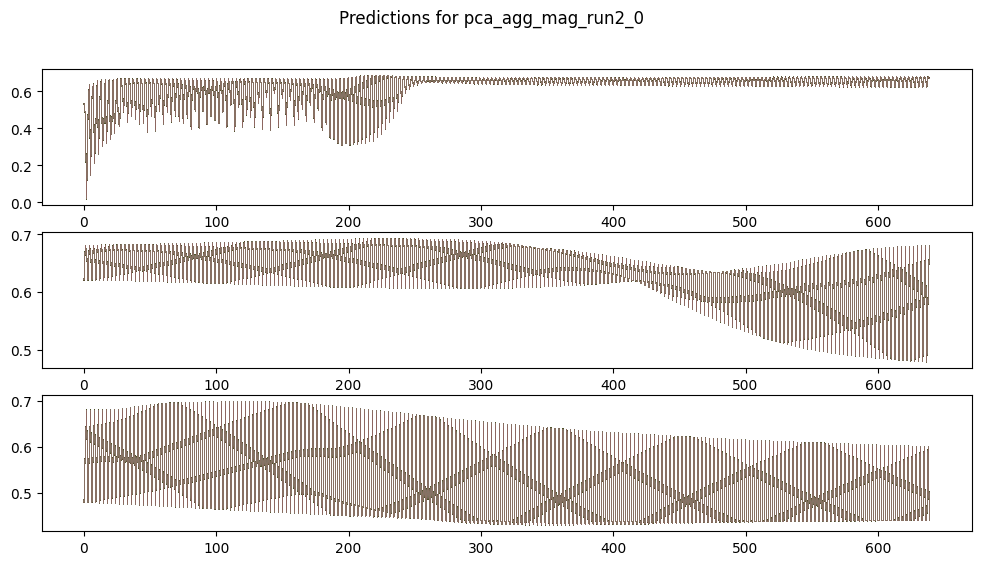

(356, 1920) (356, 1920)
Cluster shape: (313, 1920)
10/10 [==============================] - 0s 1ms/step


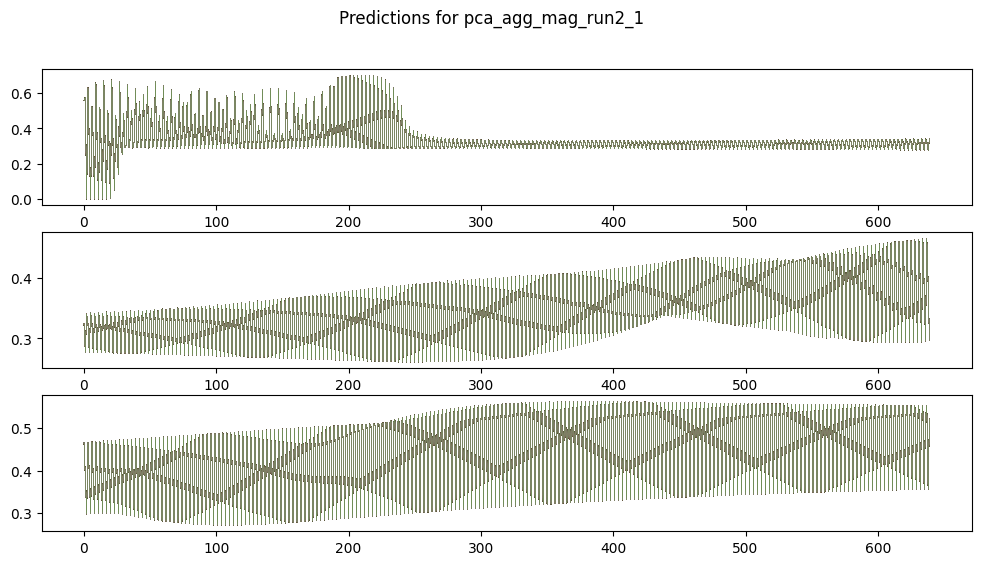

(313, 1920) (313, 1920)
Cluster shape: (276, 1920)
9/9 [==============================] - 0s 1ms/step


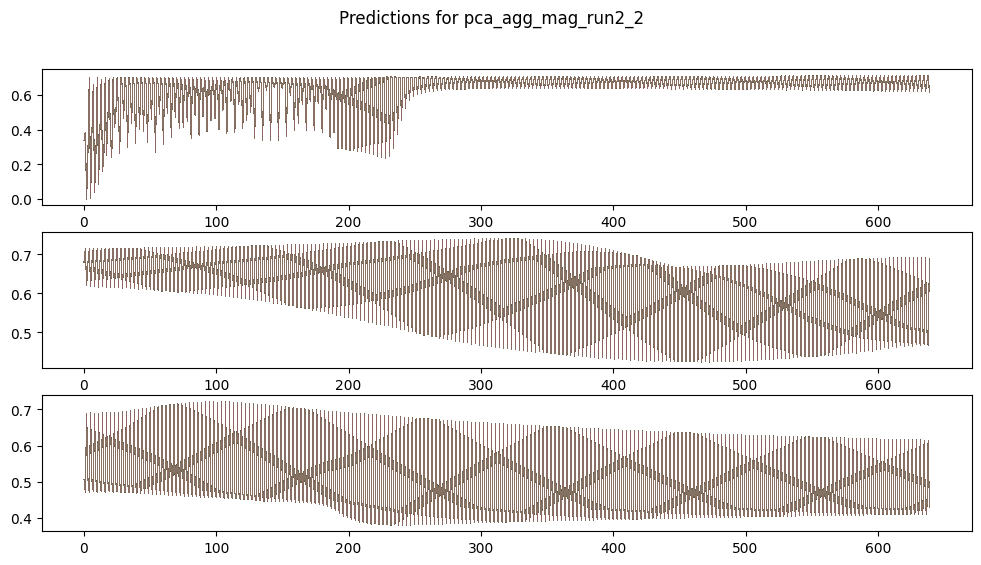

(276, 1920) (276, 1920)
Cluster shape: (233, 1920)
8/8 [==============================] - 0s 2ms/step


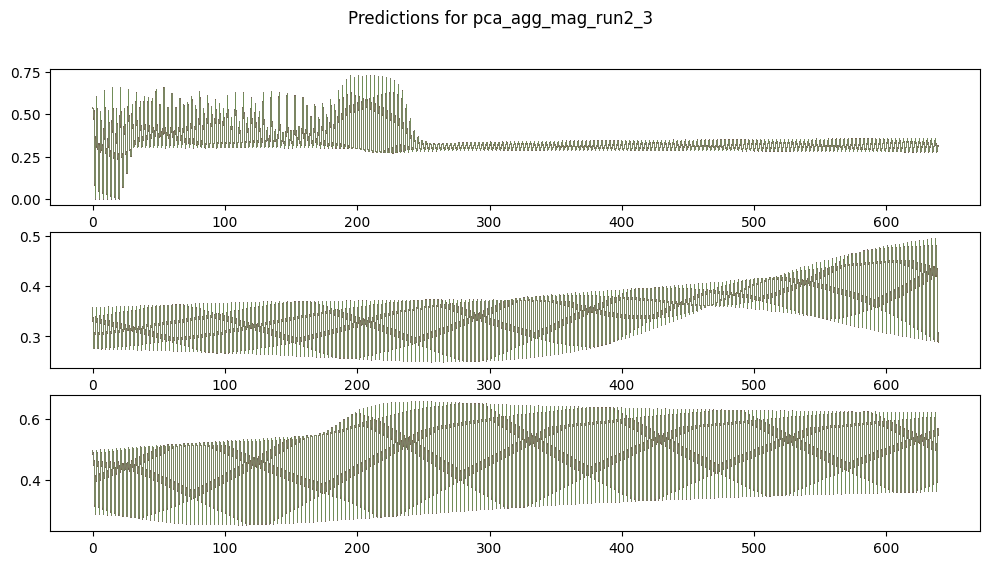

(233, 1920) (233, 1920)
Cluster shape: (262, 1920)
9/9 [==============================] - 0s 2ms/step


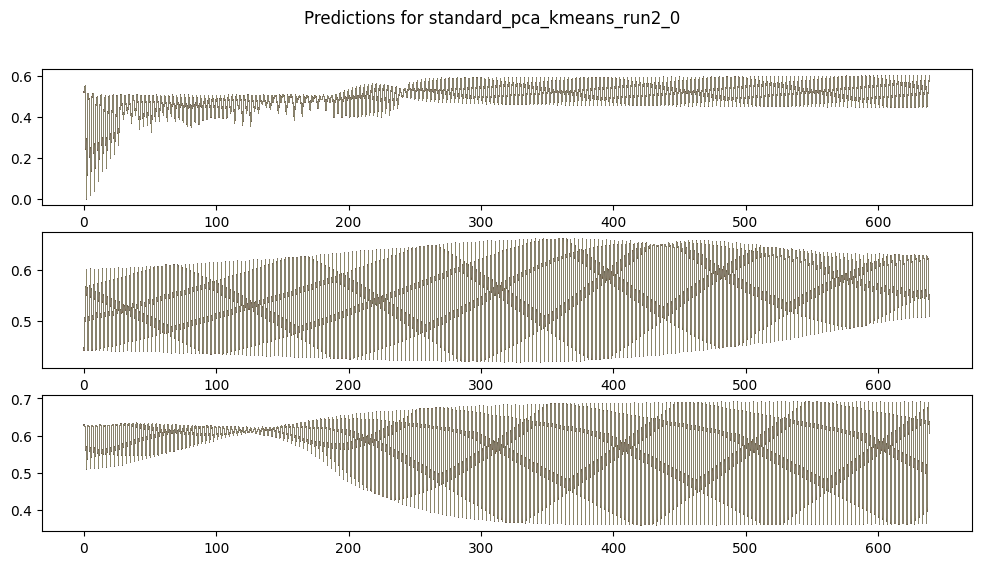

(262, 1920) (262, 1920)
Cluster shape: (320, 1920)
10/10 [==============================] - 0s 2ms/step


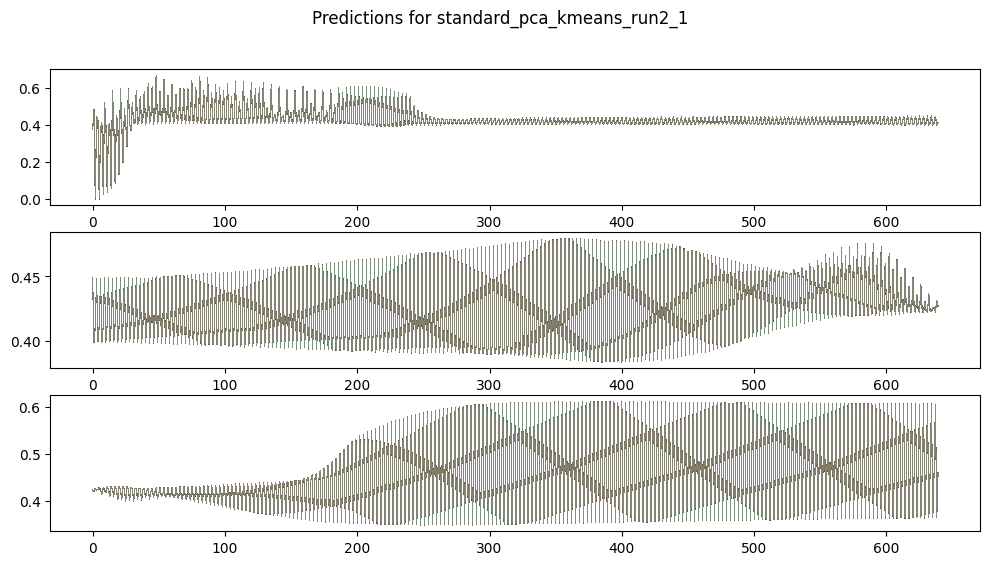

(320, 1920) (320, 1920)
Cluster shape: (214, 1920)
7/7 [==============================] - 0s 2ms/step


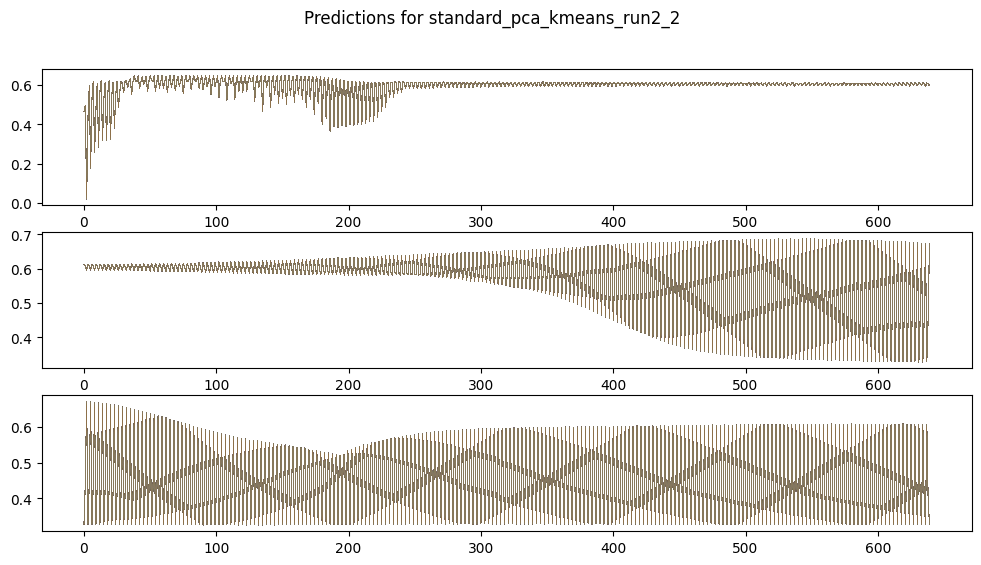

(214, 1920) (214, 1920)
Cluster shape: (382, 1920)
12/12 [==============================] - 0s 1ms/step


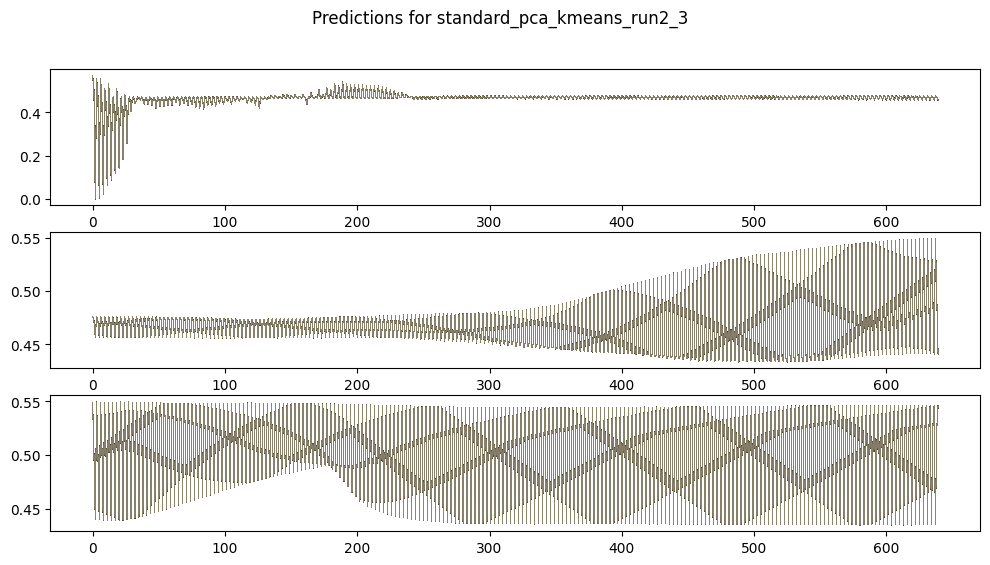

(382, 1920) (382, 1920)
Cluster shape: (262, 1920)
9/9 [==============================] - 0s 3ms/step


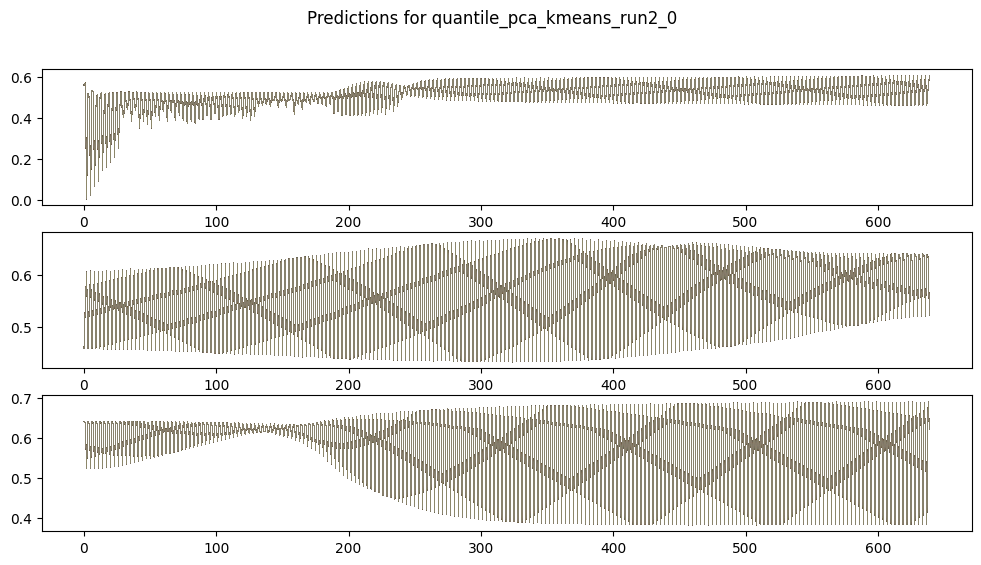

(262, 1920) (262, 1920)
Cluster shape: (320, 1920)
10/10 [==============================] - 0s 2ms/step


KeyboardInterrupt: 

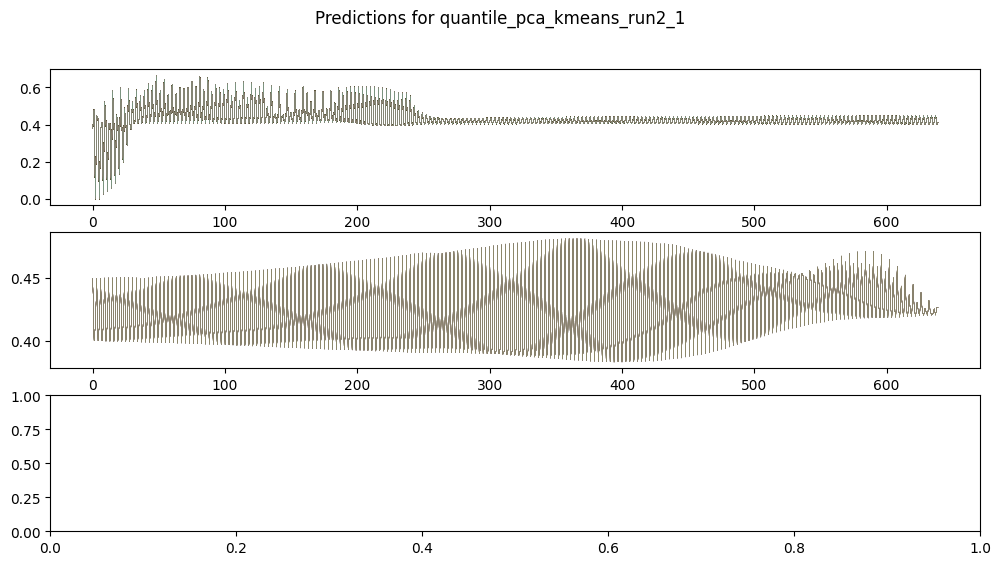

In [36]:

input_data, output_data, scaler_inputs, scaler_outputs = load_original_data(data_path)
cluster_files = set([f.stem for f in clusters_path.iterdir() if f.is_file()])

# plot best model runs
for _, row in stats_df.loc[top10].iterrows():
    # open cluster file
    with open(clusters_path / f'{row["model"]}.pkl', 'rb') as cf:
        runs = pkl.load(cf)
         
        # get clusters from best run
        for cluster_id, cluster in runs[row['run']].items():
            # print(cluster)
            # get cluster model
            model = keras.models.load_model(
                str(models_path / f'{row["model"]}' / f'{row["model"]}_run{row["run"]}_{cluster_id}.h5')
            )
            
            cluster_inputs, cluster_outputs = join_files_in_cluster(cluster, input_data, output_data)
        
            predictions = model.predict(cluster_inputs)
            
            
            # pred_df = pd.DataFrame(predictions)
            # pred_df.columns = pred_df.columns.astype(str)
            # print(pred_df.columns)
            # predictions = scaler_outputs.inverse_transform(pred_df)
            pred_df = pd.DataFrame(predictions)
            
            plot_cluster_preds(pred_df, f'{row["model"]}_run{row["run"]}_{cluster_id}')
            # plot predictions vs actuals
            print(predictions.shape, cluster_outputs.shape)
    
